In [1]:
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def get_data(model_name, task, title, generation_num):
    data_file_path = f"save_model_{model_name}/{task}/{title}/model_99/result_{generation_num}.npy"
    data = np.load(data_file_path)
    return data

In [3]:
def get_centers(task, title):
    center_file_path = f"datasets/{task}/{title}/test_squares.txt"
    with open(center_file_path, "r") as f:
        center_length = f.read().strip()
    line1, line2 = center_length.split("\n")
    centers = eval(line1[8:])
    lengths = eval(line2[8:])
    return centers, lengths

def get_para_from_center_len(center, length):
    upleft = (center[1] - length, center[0] - length)
    width = 2 * length + 1
    len = 2 * length + 1
    return upleft, width, len

In [4]:
task_title_dict = {
    "addition": ["1hole_(50, 50)_10_441_0-100", (50, 50)],
    "mod_addition": ["1hole_(56, 56)_10_441_0-113", (56, 56)],
    "base_addition": ["1hole_(50, 50)_10_441_0-100", (50, 50)],
    "linear_regression": ["1hole_(50, 50)_10_441_0-100", (50, 50)],
    # "rabbits_and_chickens": ["1hole_(70, 50)_10_441_0-100", (70, 50)]
}

In [5]:
model_name = "gpt2-medium"
generation_num = 10


4it [00:00,  4.49it/s]


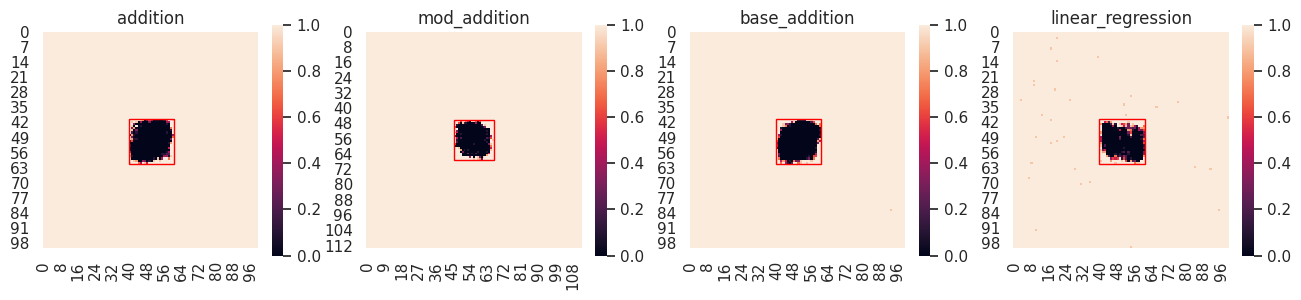

In [6]:
# ax = sns.heatmap(data)
fig, ax = plt.subplots(1,4, figsize=(16, 3))
for idx, task in tqdm(enumerate(task_title_dict.keys())):
    title, center = task_title_dict[task]
    if task in ["addition", "base_addition", "linear_regression"]:
        ub = 100
    elif task in ["mod_addition"]:
        ub = 113
    rows = np.arange(0, ub)
    columns = np.arange(0, ub)
    data = get_data(model_name, task, title, generation_num)
    # print(data.size)
    df = pd.DataFrame(data=data, columns = columns, index=rows)
    # axesSub = sns.heatmap(data=df, ax=ax[idx], cmap="YlGnBu")
    axesSub = sns.heatmap(data=df, ax=ax[idx], square="equal")
    
    upleft, width, len = get_para_from_center_len(center, 10)
    ax[idx].add_patch(plt.Rectangle(upleft, width, len, color="red", fill=False, linewidth=1))
    title = task if task != "rabbits_and_chickens" else "linear_equation"
    axesSub.set_title(title)
    # axesSub.set_title(f"$l_k$={2*10}")

# ax = sns.heatmap(df, cmap="YlGnBu")
# fig = ax.get_figure()

In [ ]:
ax

array([<Axes: title={'center': 'addition'}>,
       <Axes: title={'center': 'mod_addition'}>,
       <Axes: title={'center': 'base_addition'}>,
       <Axes: title={'center': 'linear_regression'}>], dtype=object)

In [9]:
fig.savefig(f"1holes_w_rec_red_{model_name}.pdf", bbox_inches = 'tight')

In [10]:
# data.size